<a href="https://colab.research.google.com/github/bharathkandra9/Object-Detection/blob/main/minorproject9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/minor/yolov5model

/content/drive/MyDrive/minor/yolov5model


In [6]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


In [7]:
import torch
import utils
display=utils.notebook_init()

YOLOv5 🚀 v7.0-155-g8ecc727 Python-3.10.11 torch-2.0.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


In [8]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.1 --source data/images 

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/drive/MyDrive/minor/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-155-g8ecc727 Python-3.10.11 torch-2.0.0+cu118 CPU

100% 14.1M/14.1M [00:00<00:00, 205MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/drive/MyDrive/minor/yolov5model/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 323.9ms
image 2/2 /content/drive/MyDrive/minor/yolov5model/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 1 cell phone, 184.5ms
Speed: 1.2ms pre-process, 254.2ms inference, 12

In [9]:
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0+cu118 CPU


In [10]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00


In [16]:
! curl -L "https://app.roboflow.com/ds/DFDCOrEHNq?key=9t9VybhBkE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: test/labels/d2ed1063b63dfd3b_jpg.rf.e4117043b372e08ce285852489b9c6ab.txt  
 extracting: test/labels/d38e0ccd3f29d67c_jpg.rf.cc1106b93d7e4a0214ebf38e20ab876f.txt  
 extracting: test/labels/d39172e7f44562a0_jpg.rf.0b00ed0f941f34a0772ee059a4c65874.txt  
 extracting: test/labels/d3973c8bb9dcb3ae_jpg.rf.0e4e69238d1eb24e7db730438abc3830.txt  
 extracting: test/labels/d48da3382d52ca0f_jpg.rf.b17e6a317842976d84b3ac7f58d263bb.txt  
 extracting: test/labels/d957035fd4b234d8_jpg.rf.50e28c1cf5ac92db575f336ab1177fdc.txt  
 extracting: test/labels/dd8a7bf210628fd7_jpg.rf.226fc180b10de77e20ae9a81bf255e4c.txt  
 extracting: test/labels/df1a188b1ca9d7bd_jpg.rf.d080d906fad6a9f85e9ad9fb3bf84173.txt  
 extracting: test/labels/df3baf9276029b6a_jpg.rf.9e44546d789af19557e26f11cb57d10d.txt  
 extracting: test/labels/df69468d77a3f83c_jpg.rf.10f57237927ed8ff0d4aac36146c03e9.txt  
 extracting: test/labels/dfbc7fe32d7cb3a9_jpg.rf.7298fbebead88ff937da

In [17]:
import os
os.environ["DATASET_DIRECTORY"]="/content/drive/MyDrive/datasets";

In [19]:
!python train.py --img 416 --batch 16 --epochs 10 --data data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/drive/MyDrive/minor/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-155-g8ecc727 Python-3.10.11 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, ancho

In [27]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --line-thickness 3 --source test/images 

detect: weights=['runs/train/exp/weights/best.pt'], source=test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/drive/MyDrive/minor/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-155-g8ecc727 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/193 /content/drive/MyDrive/minor/yolov5model/test/images/00acf53b127218c2_jpg.rf.90c67dfa7ba0e7885699f84475286c7f.jpg: 416x416 2 Cars, 141.0ms
image 2/193 /content/drive/MyDrive/minor/yolov5model/test/images/019483ccc1cc242b_jpg.rf.05ec82df83bcc078671ed8fa8a252768.jpg: 416x416 4 Cars, 

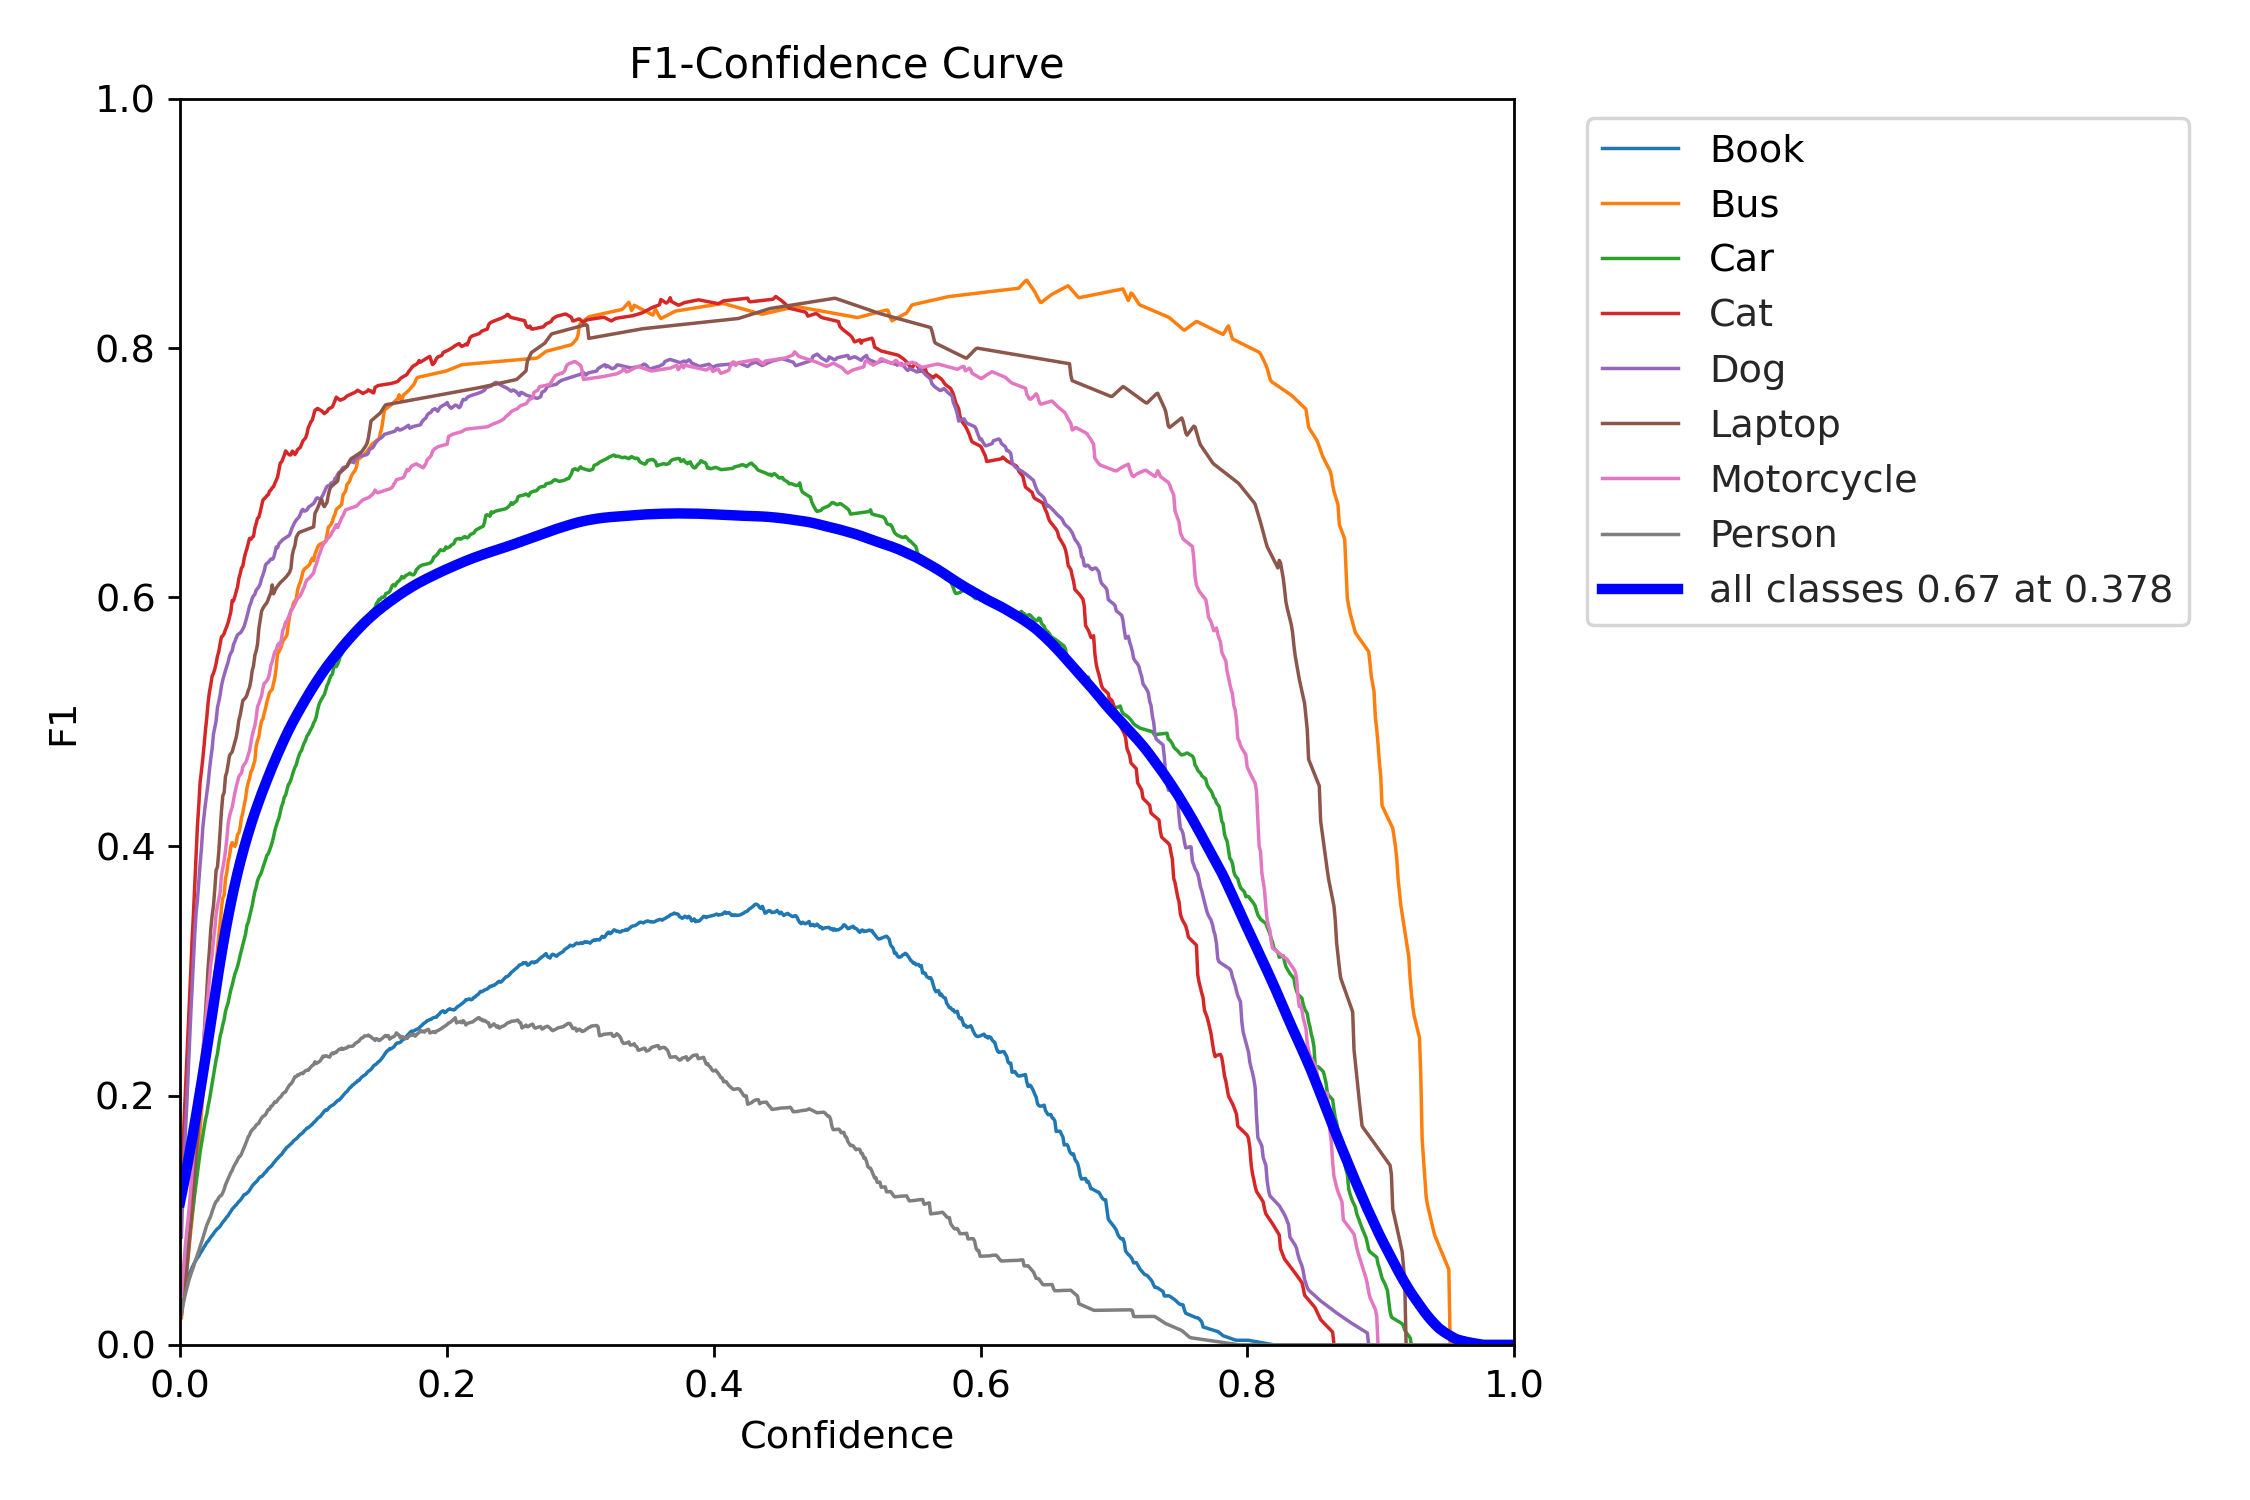

In [21]:
from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp2/F1_curve.png', width=1000)  # view results.png

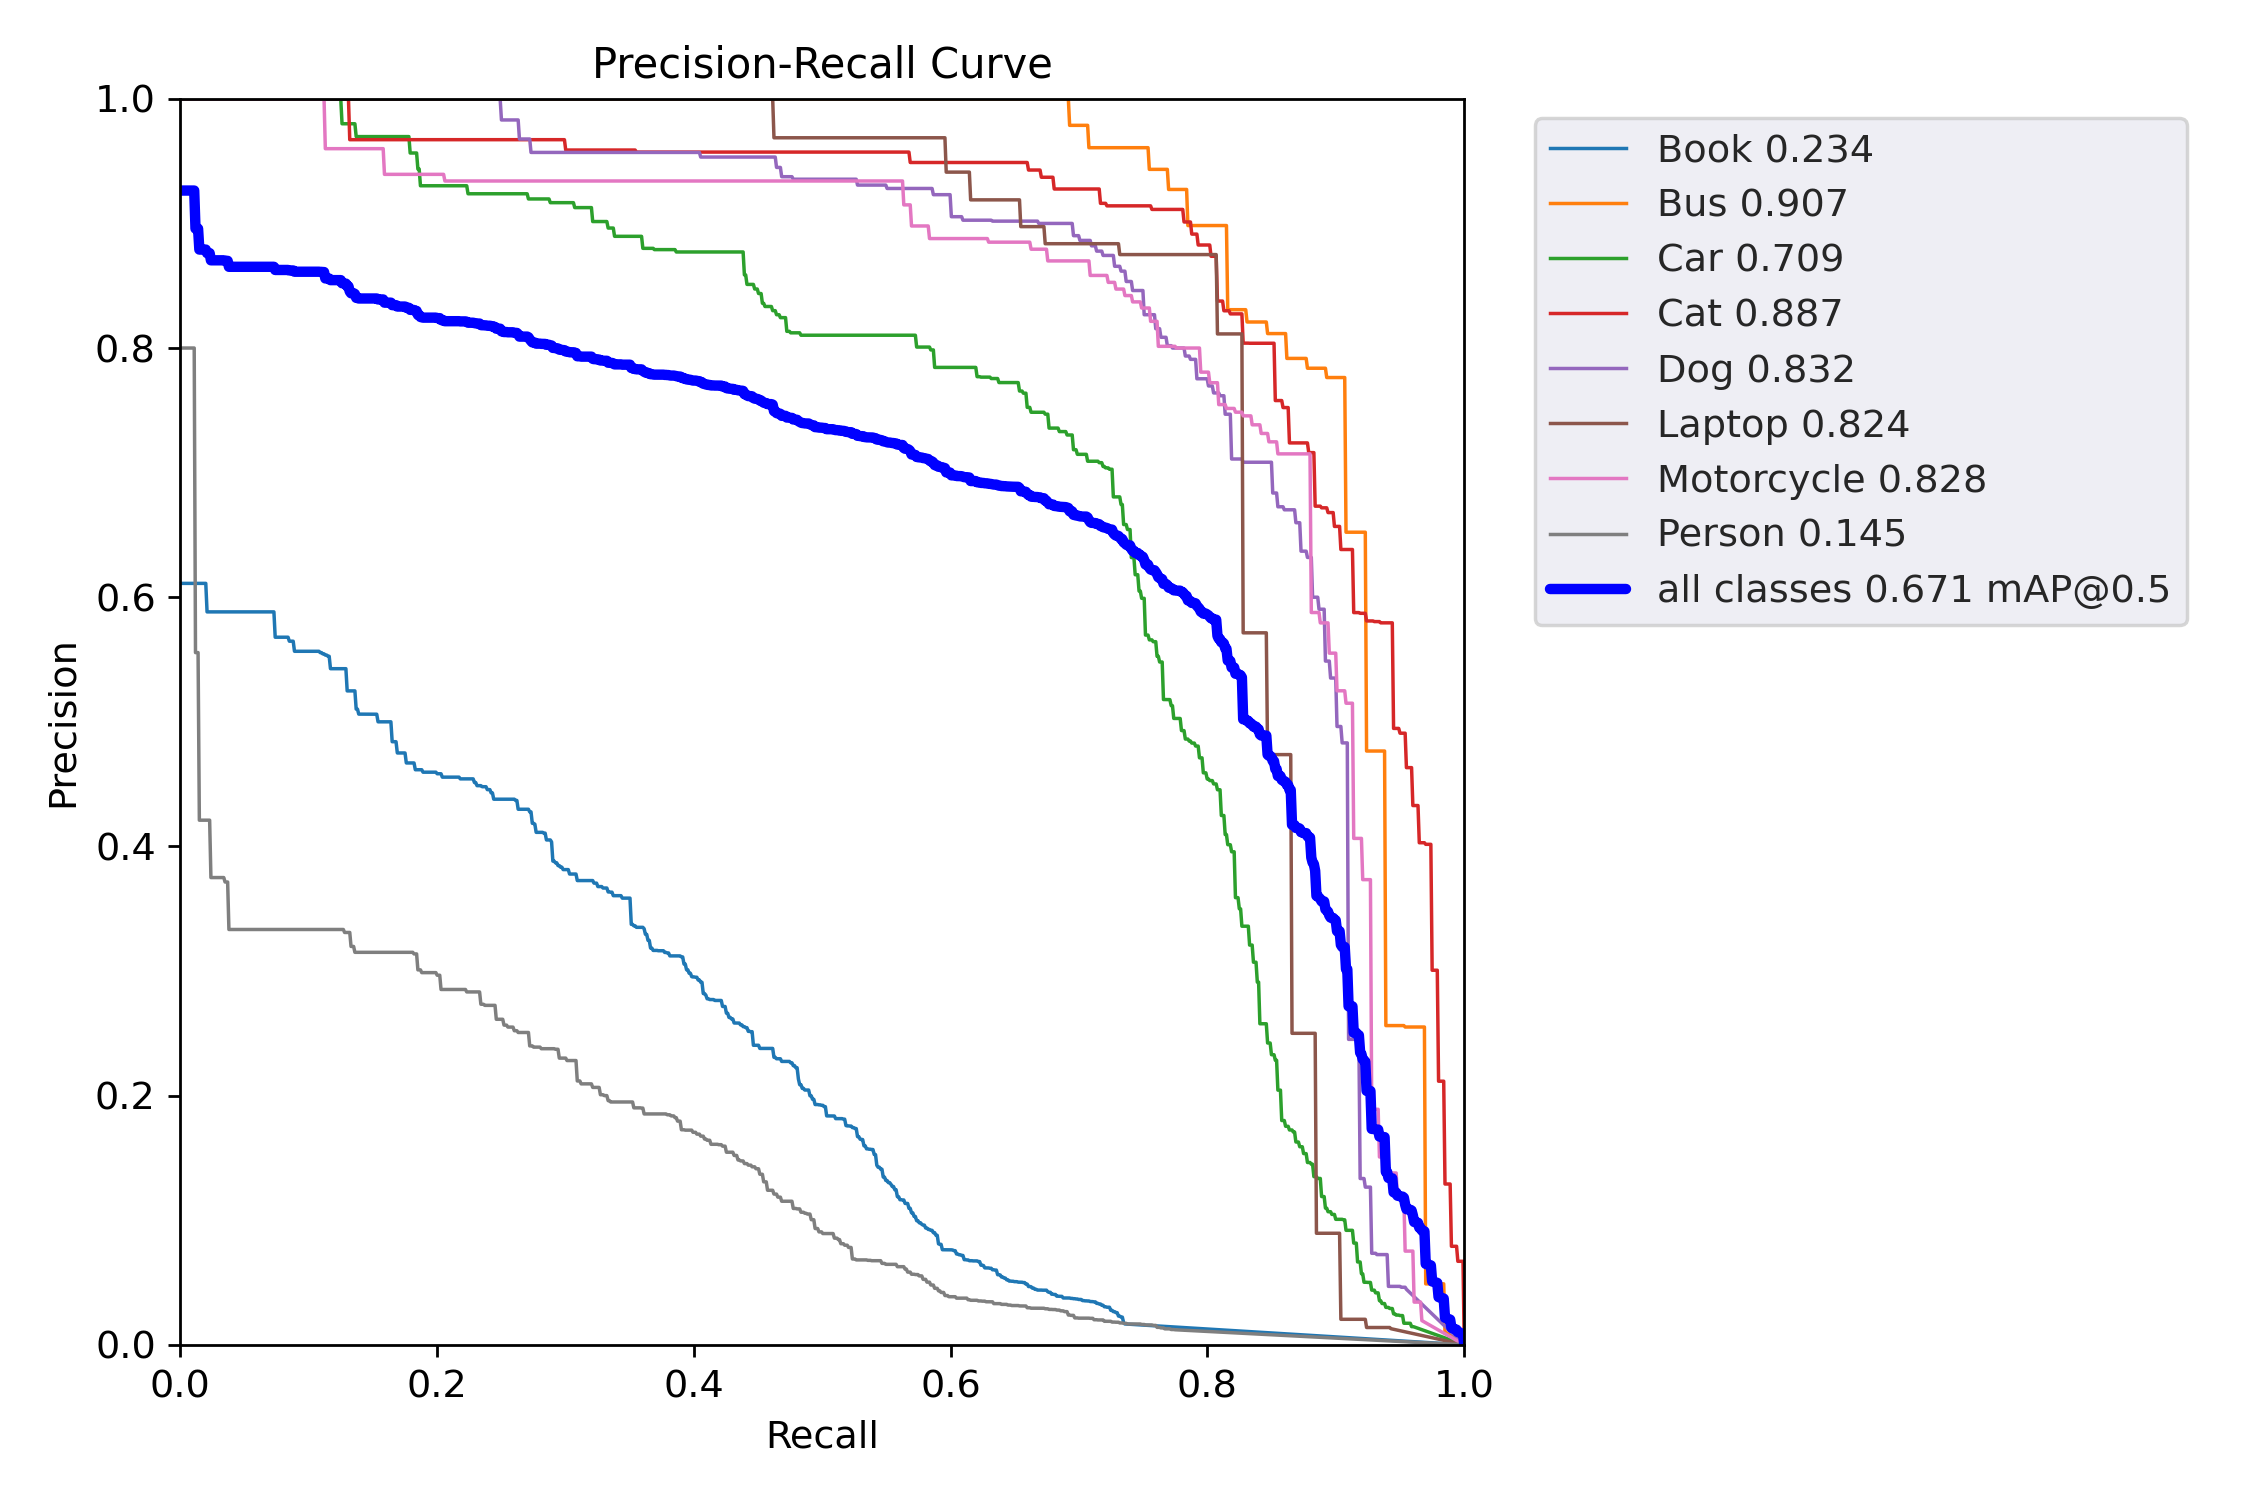

In [22]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp2/PR_curve.png', width=1000)

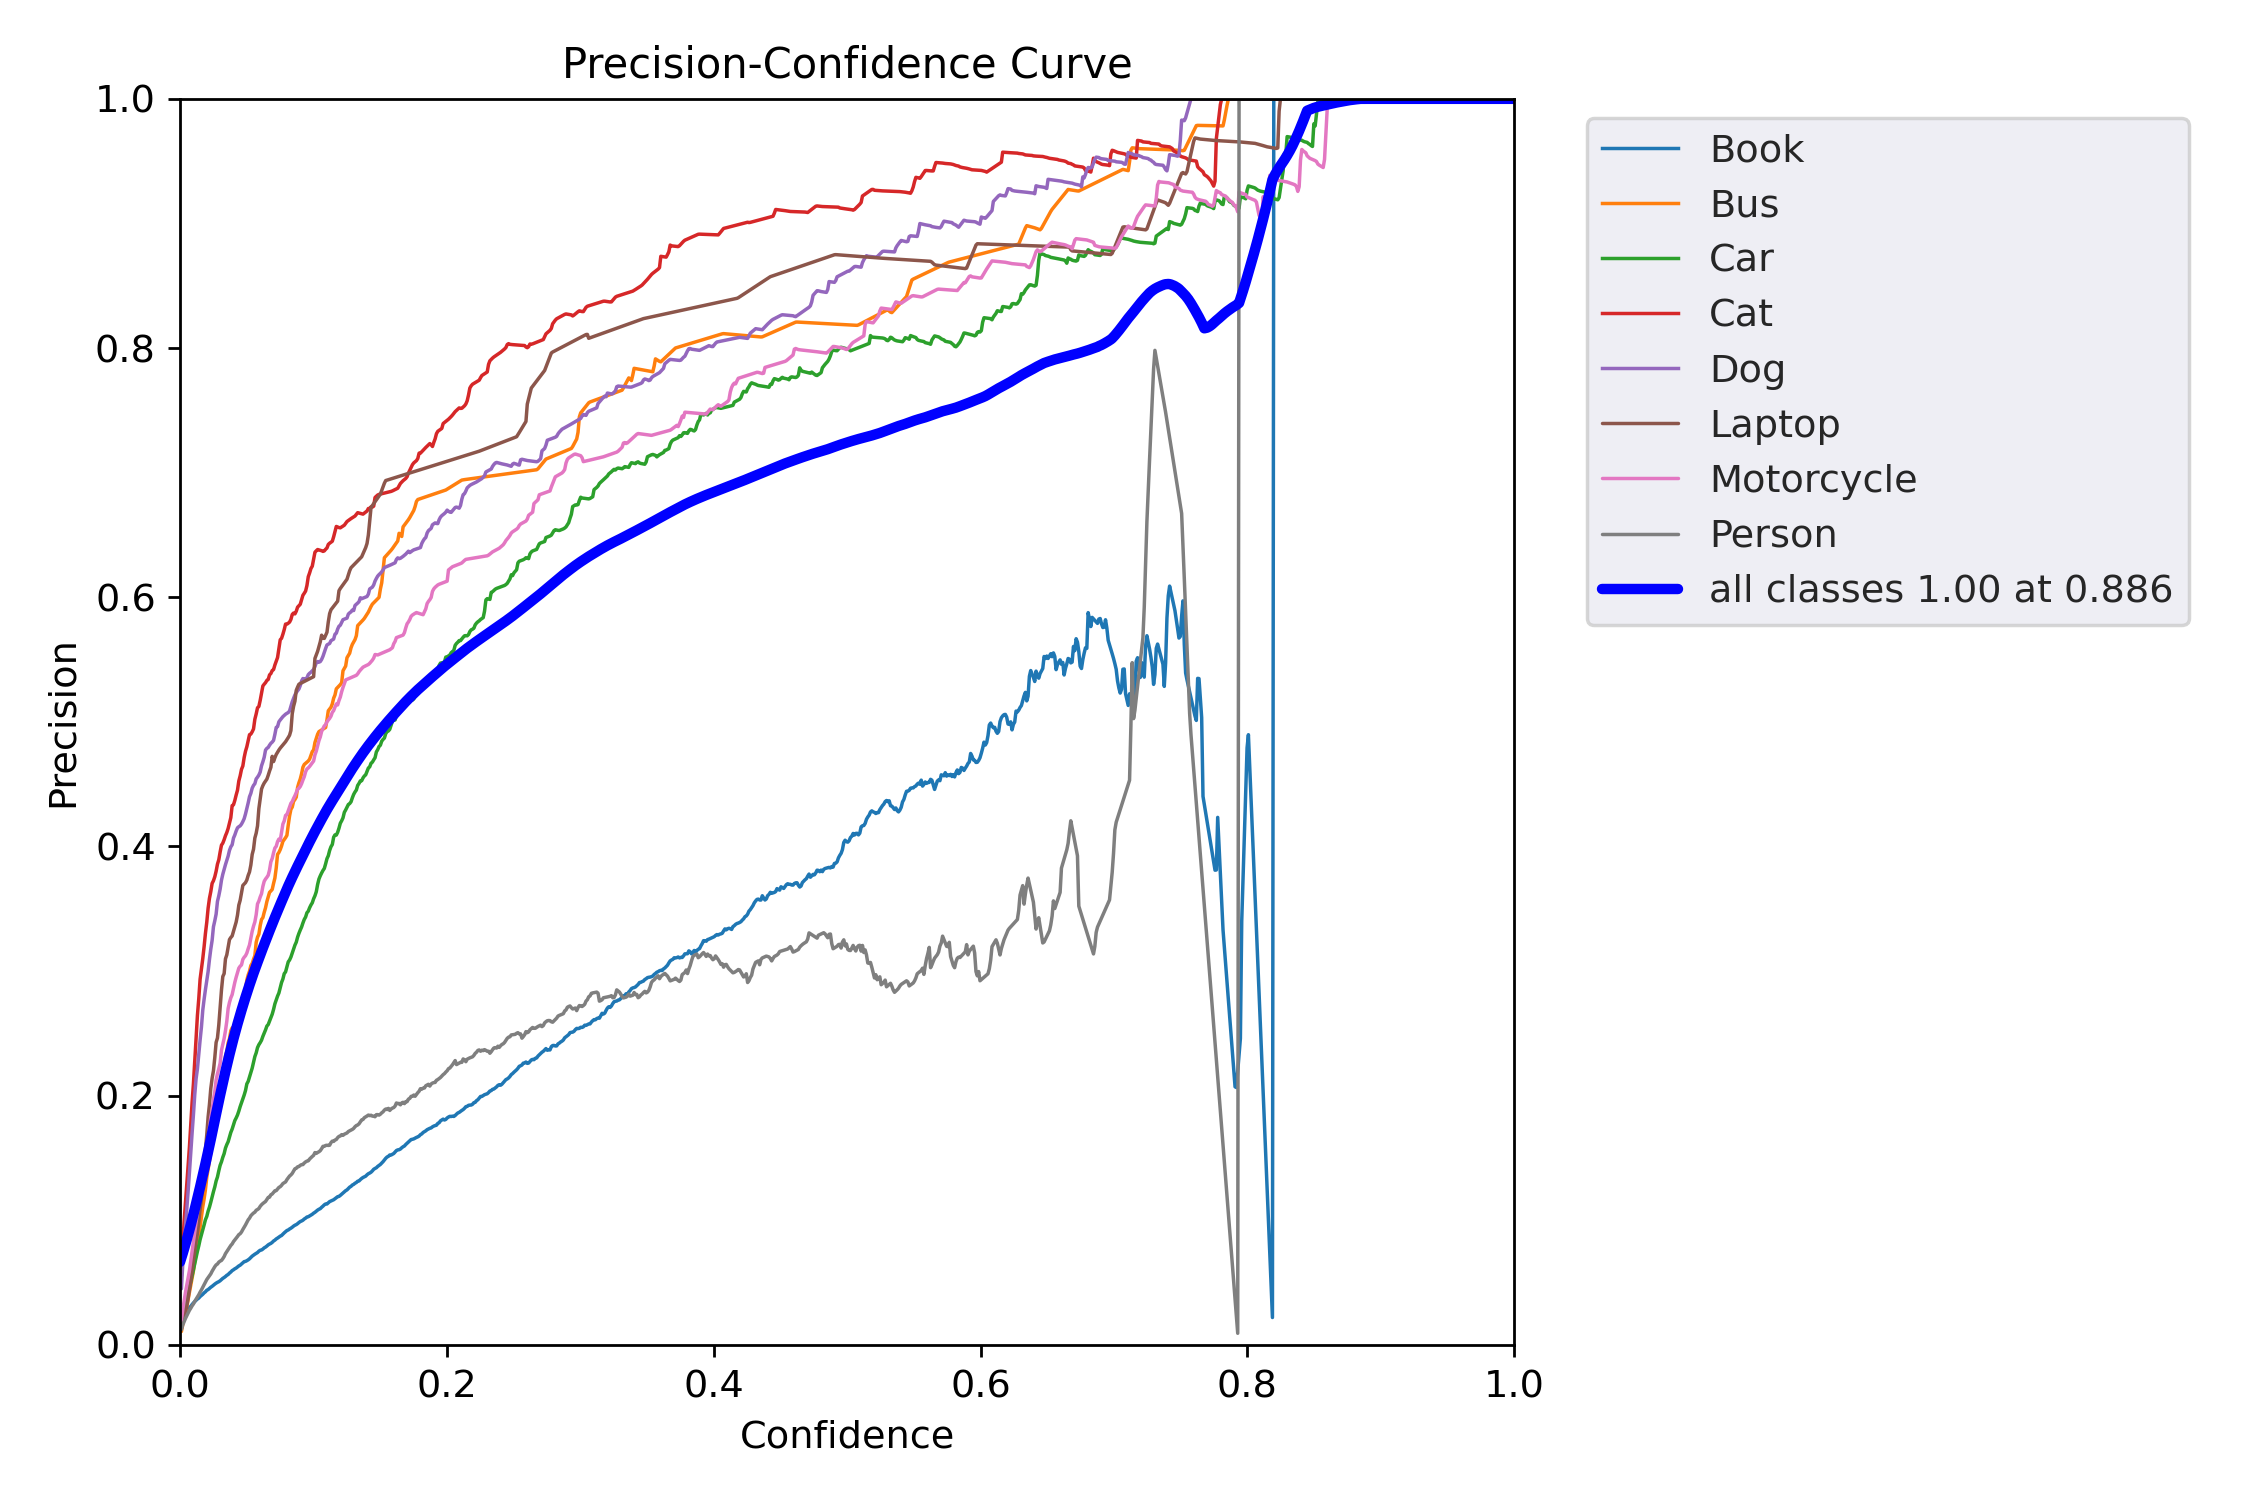

In [23]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp2/P_curve.png', width=1000)

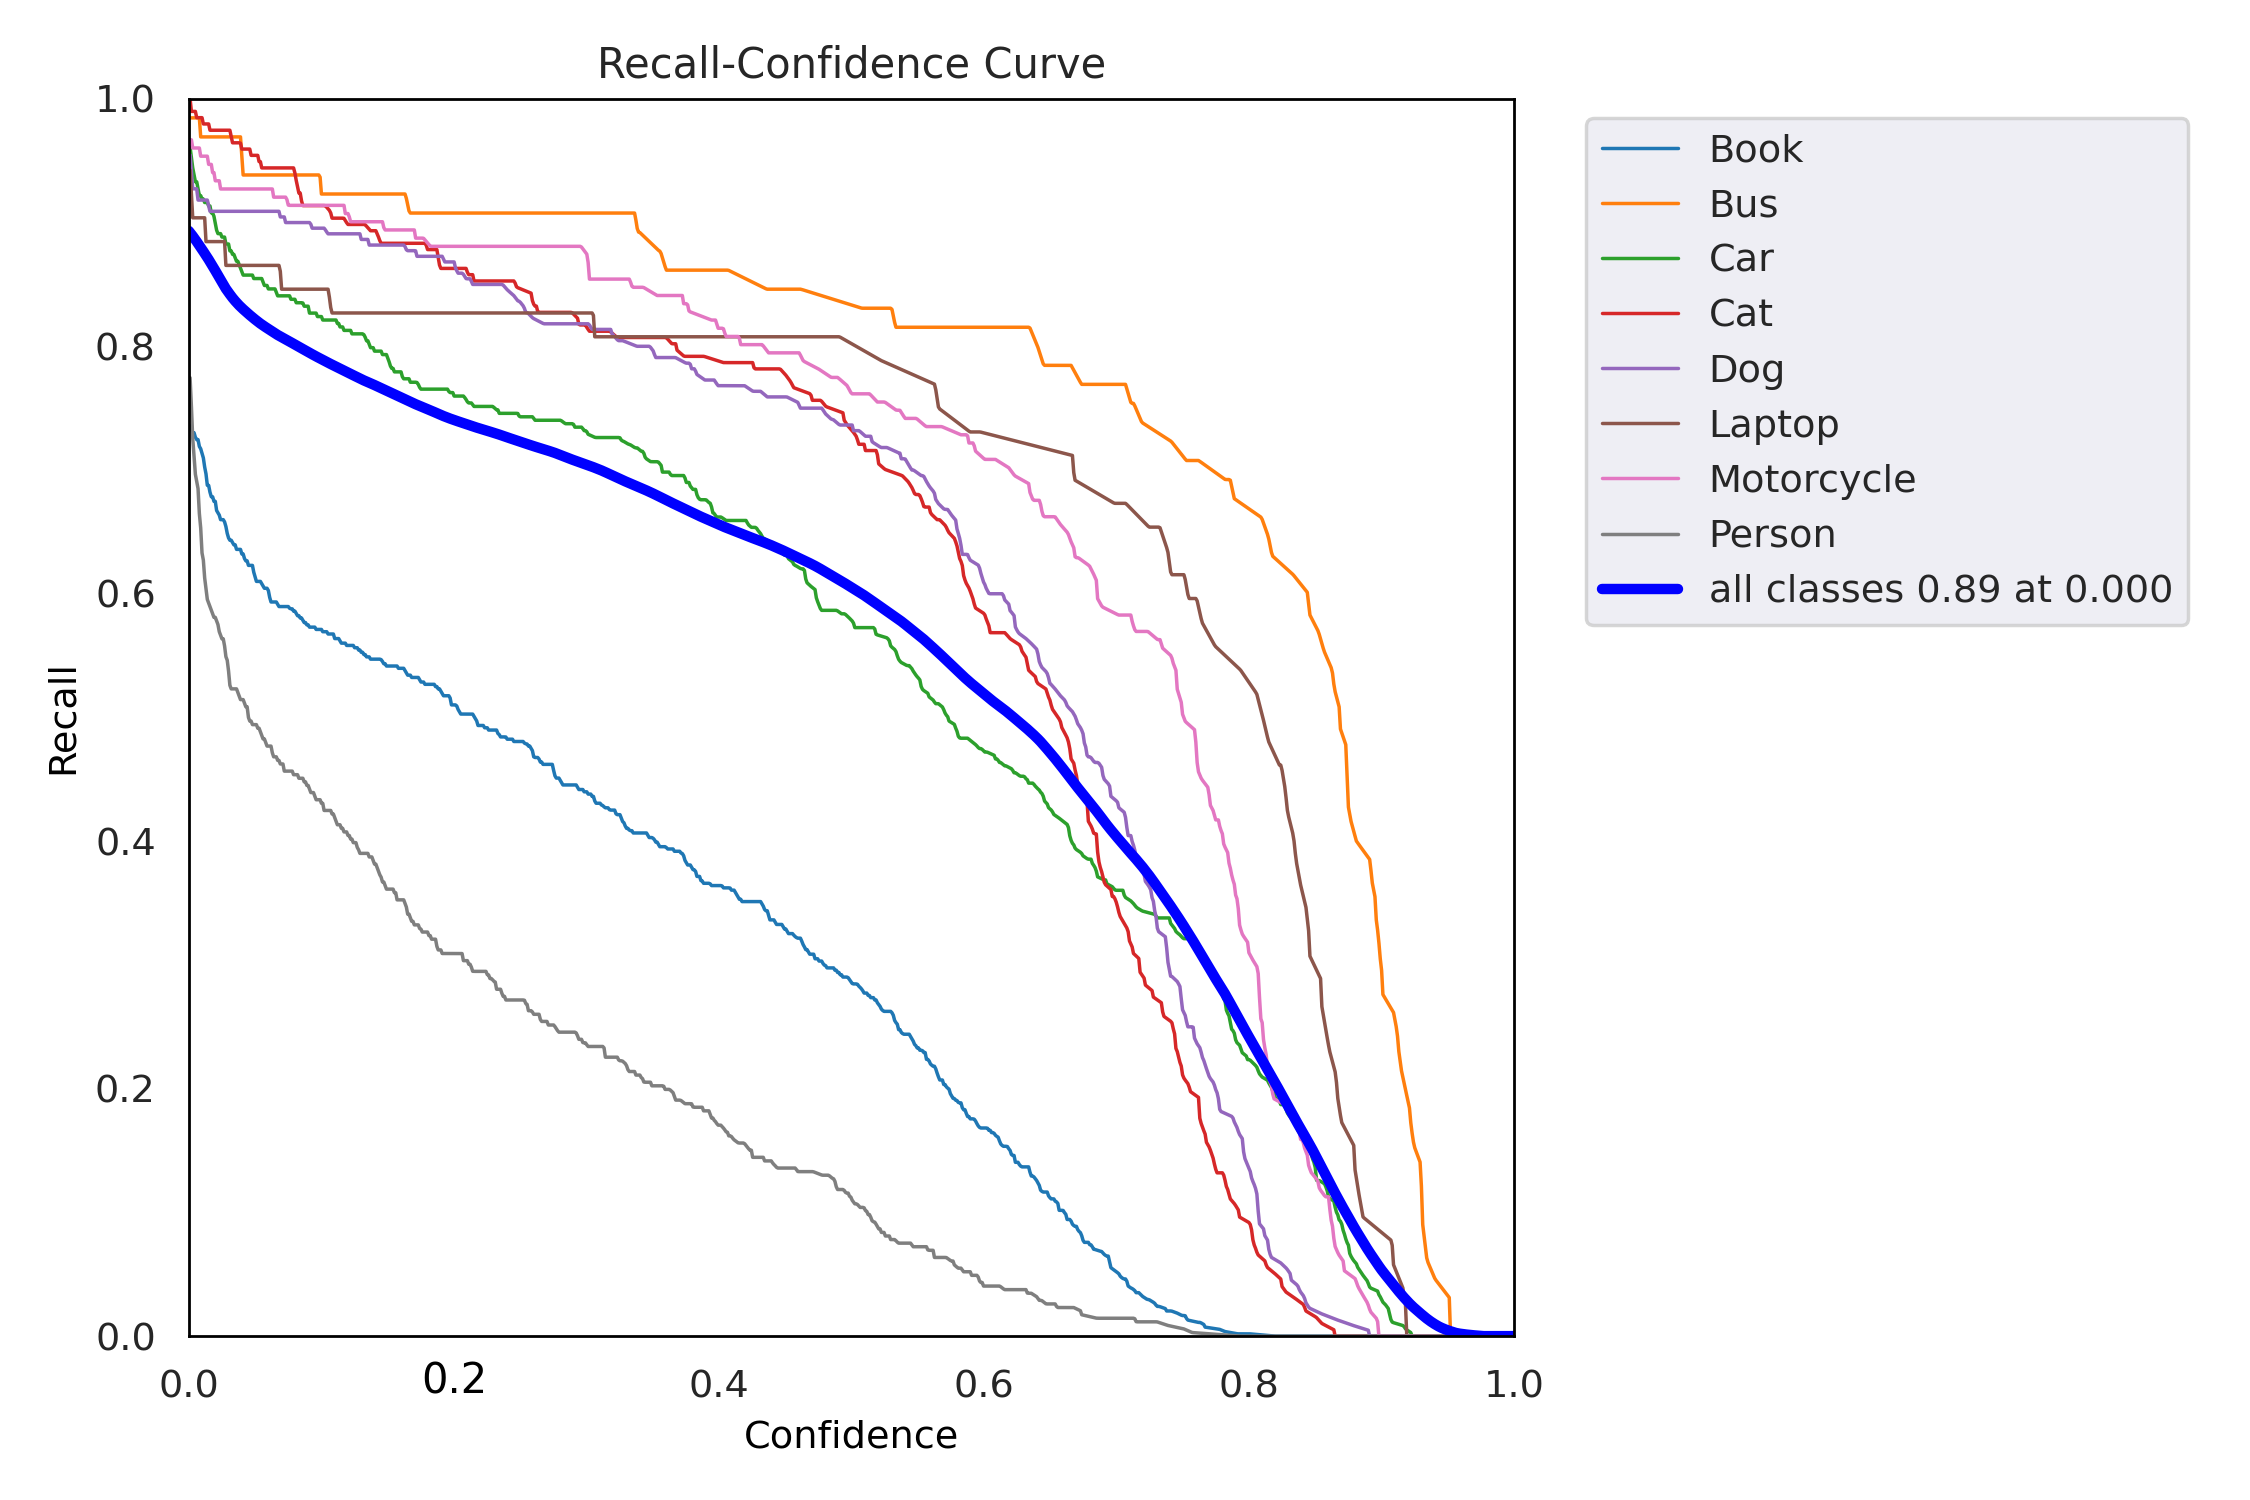

In [24]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp2/R_curve.png', width=1000)

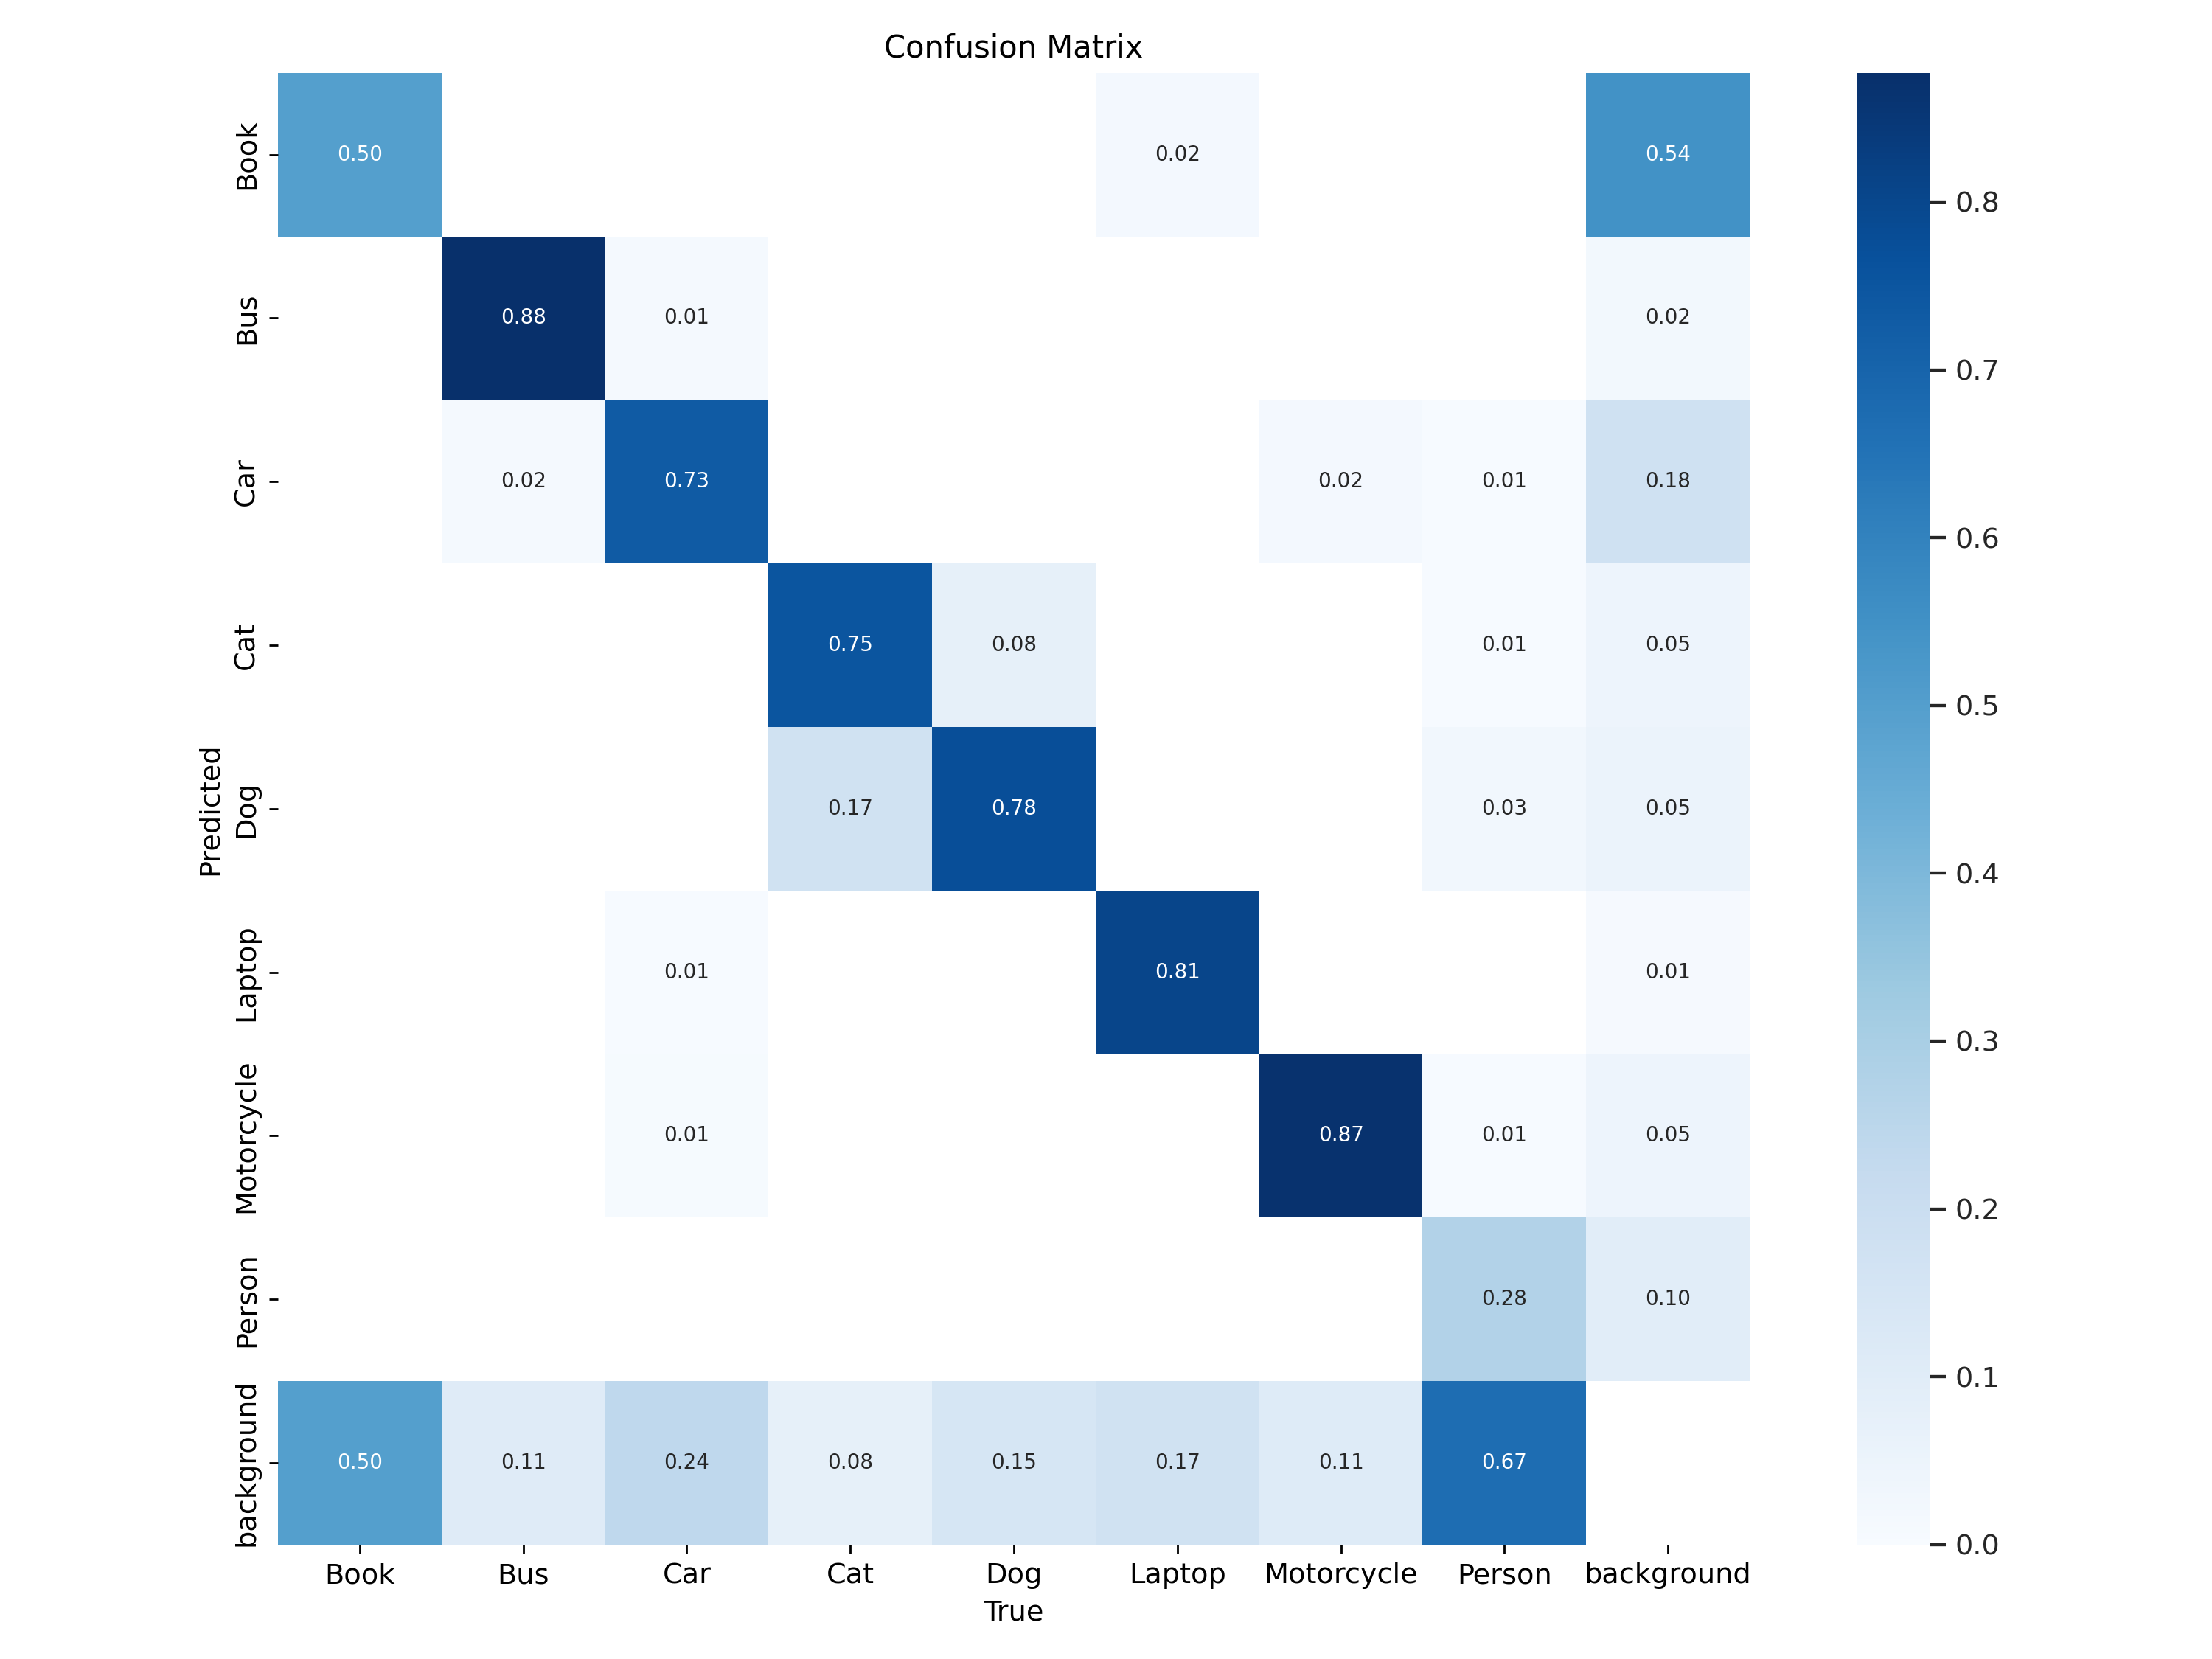

In [25]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp2/confusion_matrix.png', width=1000)

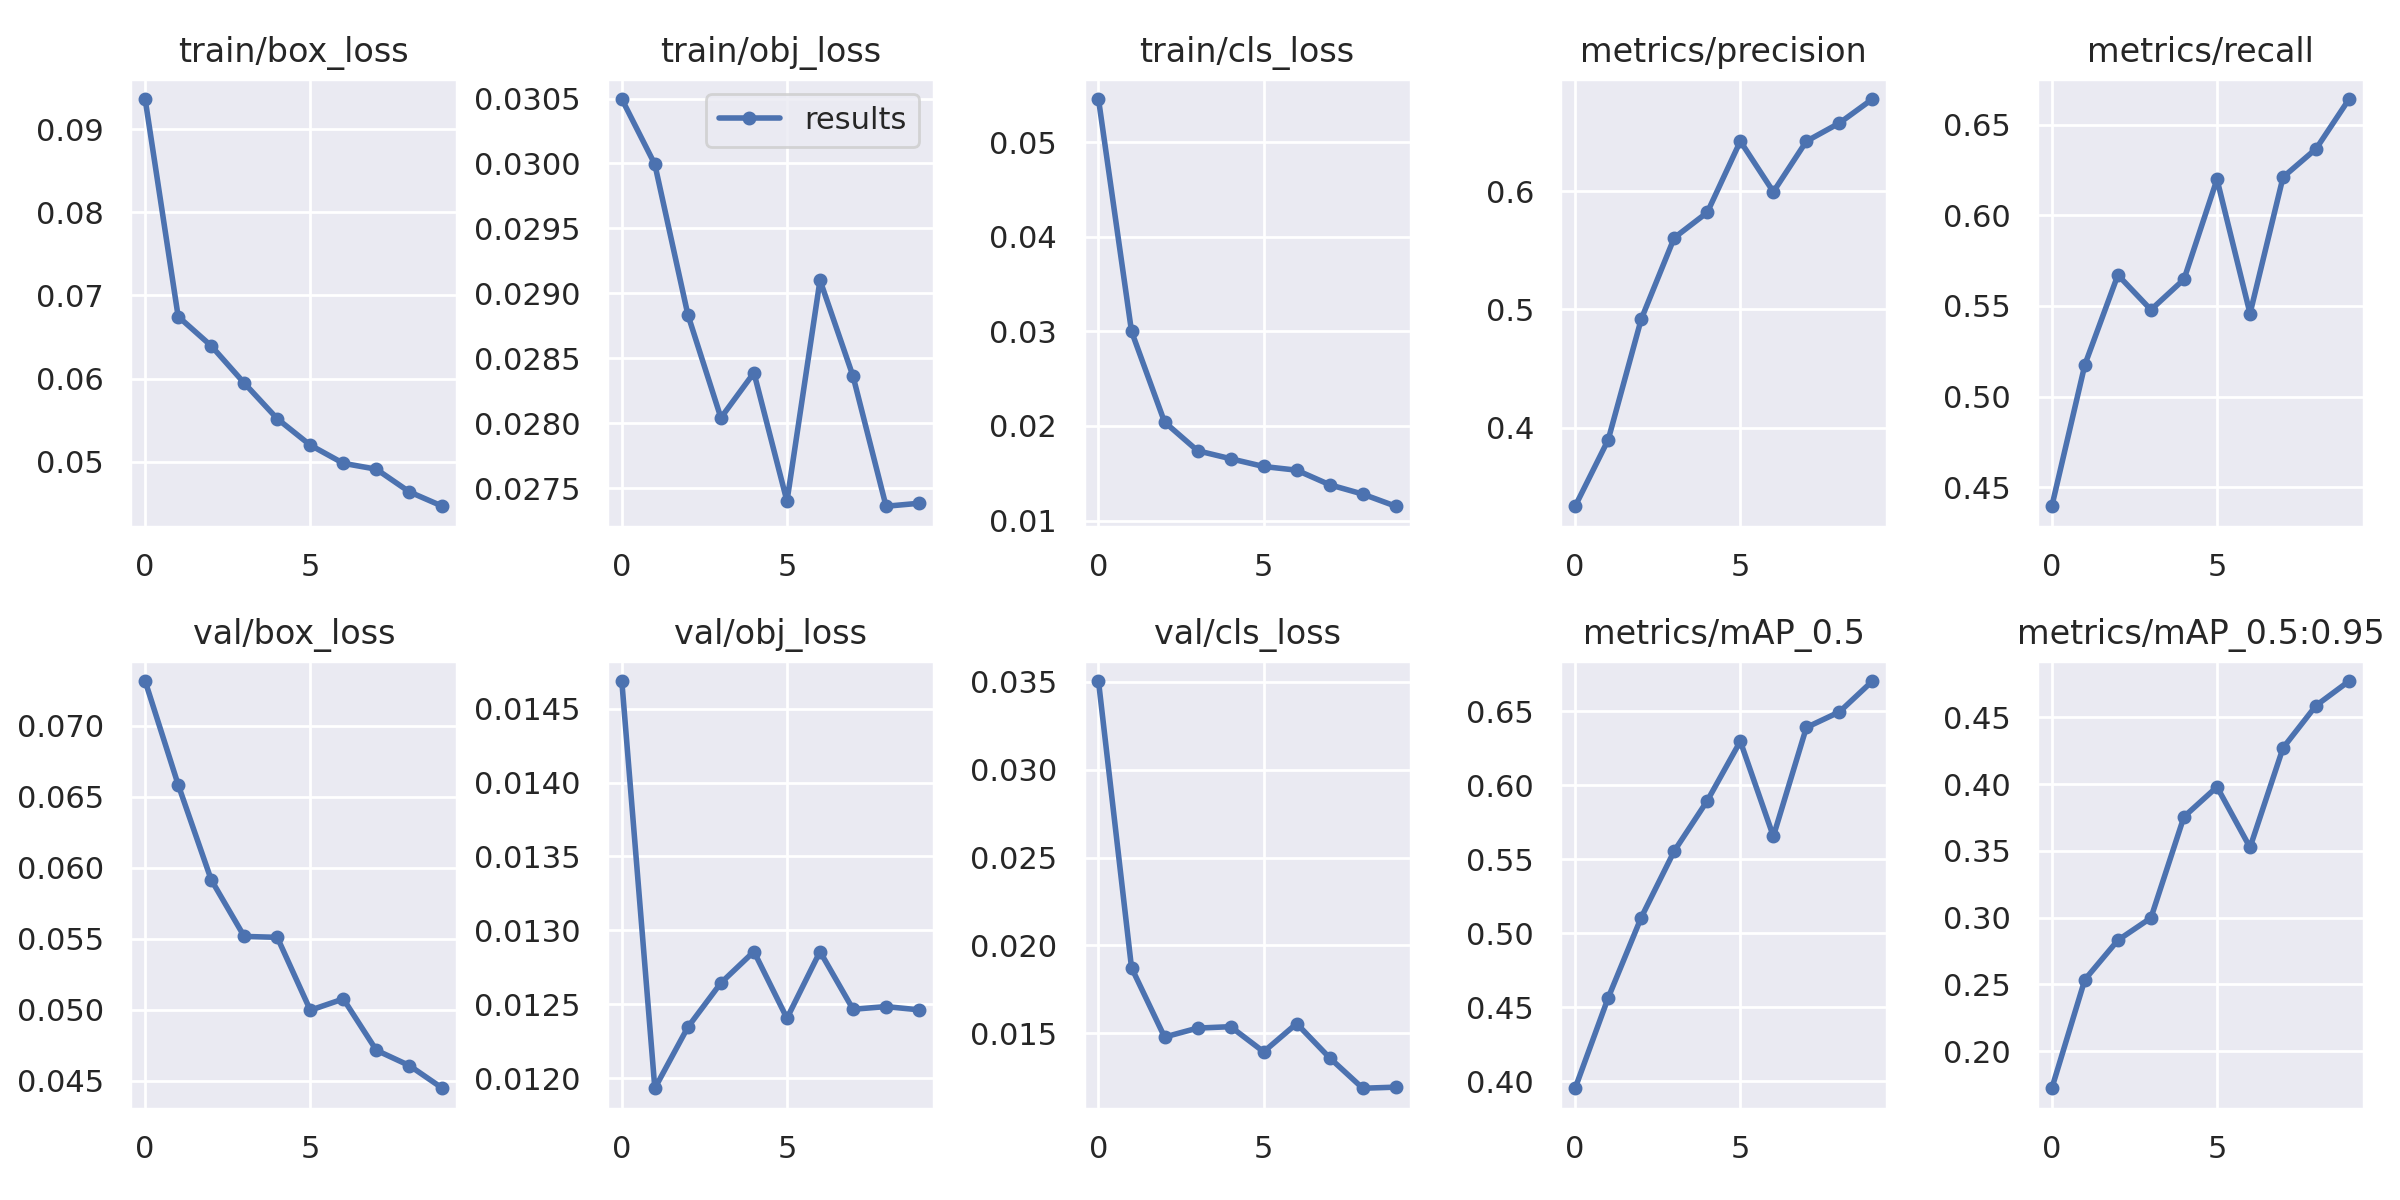

In [26]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp2/results.png', width=1000) 